In [31]:
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [32]:
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

In [33]:
type(y_train)

numpy.ndarray

In [34]:
layer_sizes = (100)
alpha = 0.0001 # alpha used by L2 regularization
batch_size = 10
step_size = 0.0000001


constant_model = MLPRegressor(solver="sgd", batch_size=batch_size, learning_rate_init=step_size)
adam_model = MLPRegressor(solver="adam", batch_size=batch_size)


In [35]:
def partial_train_loop(model: sklearn.neural_network._multilayer_perceptron.MLPRegressor, n_epochs: int, train_data:np.ndarray, train_labels:np.ndarray, test_data:np.ndarray, test_labels:np.ndarray):
    errors = []
    losses = []
    for epoch in range(n_epochs):
        model.partial_fit(train_data, train_labels)
        preds = model.predict(test_data)
        errors.append(mean_absolute_error(test_labels, preds))
        losses.append(model.loss_)


    return model, errors, losses

In [36]:
mod, errs, loss = partial_train_loop(constant_model, 50, x_train, y_train, x_test, y_test)

In [37]:
adam_mod, adam_errs, adam_loss = partial_train_loop(adam_model, 50, x_train, y_train, x_test, y_test)

In [38]:
adam_errs

[7.5747912729782625,
 6.878987975945146,
 6.305417526546583,
 6.196709415179709,
 5.81633373721813,
 5.8724894244697206,
 7.2046597940075205,
 4.970521019870736,
 5.82653682734344,
 4.7058886951498184,
 4.585715697024256,
 4.878432827316805,
 4.815433115765952,
 5.294961130915347,
 4.2033759504448645,
 4.248344705933968,
 4.225154690593636,
 4.6231800543105335,
 5.248163456110603,
 4.078520138067472,
 5.3982383271727485,
 5.2557006610730665,
 6.1510455693490504,
 4.616453490469695,
 4.837535154701721,
 5.503127262667787,
 4.003126415191674,
 4.134105084808116,
 5.254029282748219,
 4.625055257720436,
 4.602880449602795,
 4.065580212866503,
 3.7985617432240337,
 3.767388953352354,
 4.748185001800401,
 4.157679202261805,
 3.8587823428485537,
 5.112575874420192,
 3.9713024781311748,
 4.226243703876553,
 3.8413979889789243,
 3.7178907581156433,
 4.267227159168772,
 5.536861015729525,
 3.6788969573116574,
 3.7819769593233903,
 4.106493697836617,
 4.167099345613642,
 3.6966800864412077,
 3.86

Text(0, 0.5, 'mean absolute error')

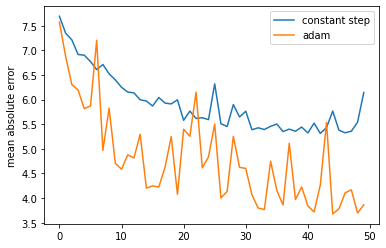

In [39]:
plt.plot(range(len(errs)),errs, label="constant step")
plt.plot(range(len(errs)),adam_errs, label = "adam")
plt.legend()
plt.ylabel("mean absolute error")

In [40]:
loss

[372.1180820496661,
 58.66809054742934,
 55.01060184790235,
 51.87834608141893,
 49.57264289999285,
 47.88539367774645,
 46.53619751425343,
 44.61764454261873,
 43.23235913525305,
 41.69669267758493,
 40.93602000683284,
 39.95704628967052,
 38.72520226234299,
 38.724176907373135,
 37.10961752127793,
 36.02748394922281,
 35.45198935784864,
 35.326918334330315,
 33.98285721969601,
 34.27749806957144,
 33.65777614227112,
 34.390341349830344,
 32.739600068150274,
 33.068183849866585,
 31.88463340535536,
 32.22688692045206,
 32.70301186254103,
 30.925978245827938,
 30.224197853762487,
 30.286057721595654,
 30.164837704599513,
 29.995972167676815,
 30.63895995424906,
 29.416634609661443,
 30.288082731457006,
 29.284325746380045,
 29.002732929668444,
 29.16934980163,
 29.131443308783588,
 29.550374256509034,
 28.39871625999026,
 28.3722570134437,
 28.016121906579038,
 28.112886847848127,
 28.170669872399664,
 28.16189744273115,
 27.80143168882084,
 27.700130435980128,
 27.666876185748873,
 27